# CoronaVirus Data Analysis

To understand the trend of Virus spread at Country, State and City level I have created this jupyter notebook.
The data used is taken from Johns Hopkins Universities open source on github which is in-accordance with WHO and CDC.

The data can be visualized at country, state and city level, by simplying using country, state, city as arguements to the function calls.The values that can be passed in the above parameters can be of string or list type only.

The data can be visualized in independent continents such as americas, africa, europe, australia, apac by simply appending the continent name at the end of function name 'maps.mapping_'.

# Importing Required Packages of Python

In [1]:
import sys
sys.path.append('./')
from src import ReadData as rd
from src import maps
from src import DataPlotting as dap
from src import DataFormatting as daf
from src import CurrentDate

# Importing Data from Daily Report Files

In [2]:
COVID_DATA_df = rd.importfiles()
US_COVID_DATA_df = rd.cities_usa_importfiles()

# World and US Map

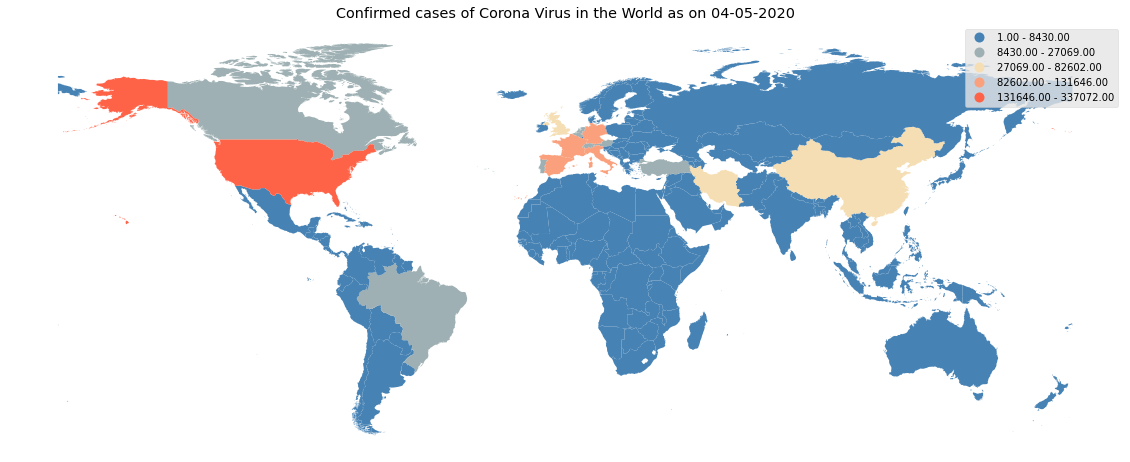

In [3]:
maps.mapping_world(COVID_DATA_df,'Confirmed')

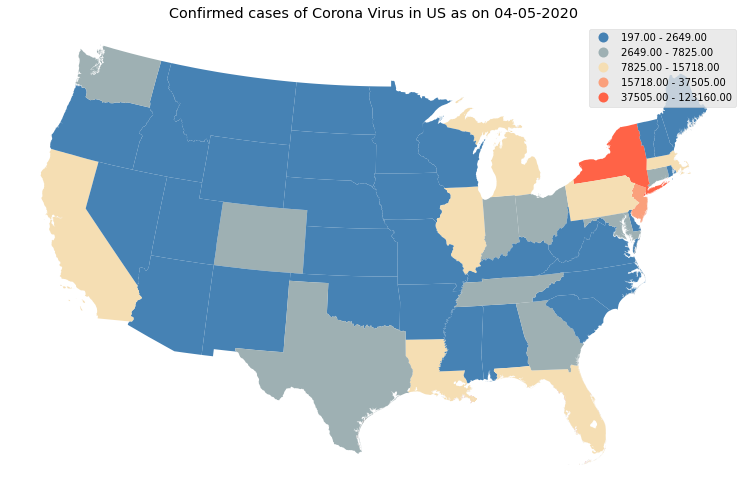

In [4]:
maps.mapping_usa(US_COVID_DATA_df,'Confirmed')

# Viewing the data in a continent

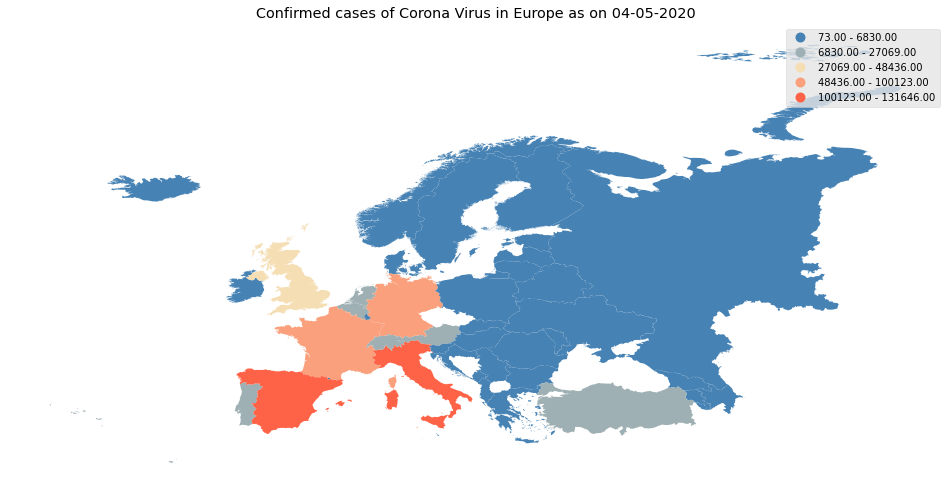

In [5]:
maps.mapping_europe(COVID_DATA_df,'Confirmed')

# CoronaVirus Tabular Format

In [6]:
df = daf.corona_table(COVID_DATA_df)
df.head(15)

,Country/Region,Confirmed,New Confirmed,Deaths,New Deaths,Recovered,Active Cases,Tot Cases/ 1M Pop,Deaths/ 1M Pop
0,US,337072,28222,9619,1212,17448,310005,1018,29
1,Spain,131646,5478,12641,694,38080,80925,2816,270
2,Italy,128948,4316,15887,525,21815,91246,2133,263
3,Germany,100123,4031,1584,140,28700,69839,1195,19
4,France,93773,2925,8093,519,16349,69331,1437,124
5,China,82602,59,3333,3,77207,2062,57,2
6,Iran,58226,2483,3603,151,19736,34887,693,43
7,United Kingdom,48436,5959,4943,623,229,43264,713,73
8,Turkey,27069,3135,574,73,1042,25453,321,7
9,Switzerland,21100,595,715,49,6415,13970,2438,83


# Plotting The Timeline of CoronaVirus Across The Globe

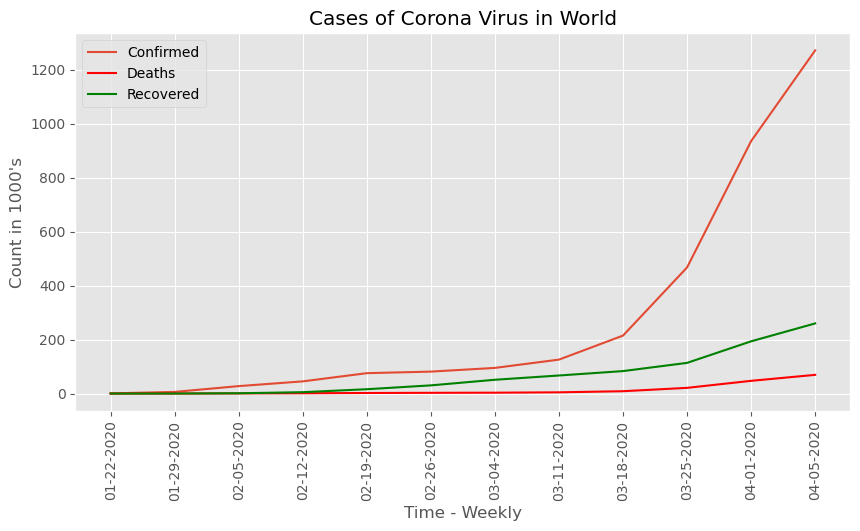

In [7]:
dap.plot_timeline_total(COVID_DATA_df)

# Plotting Timeline of Countries/States/Cities with Highest CoronaVirus Cases

# Cases in Top 5 Impacted Countries

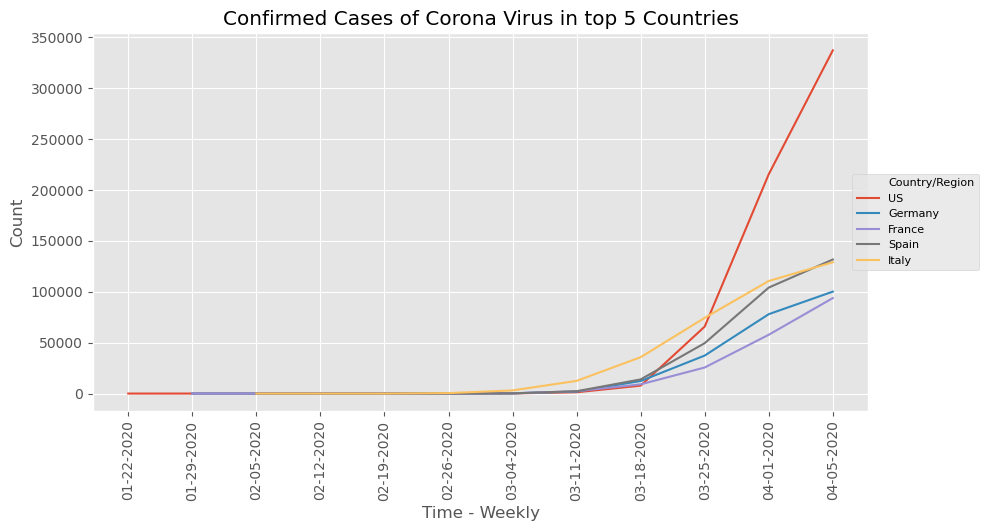

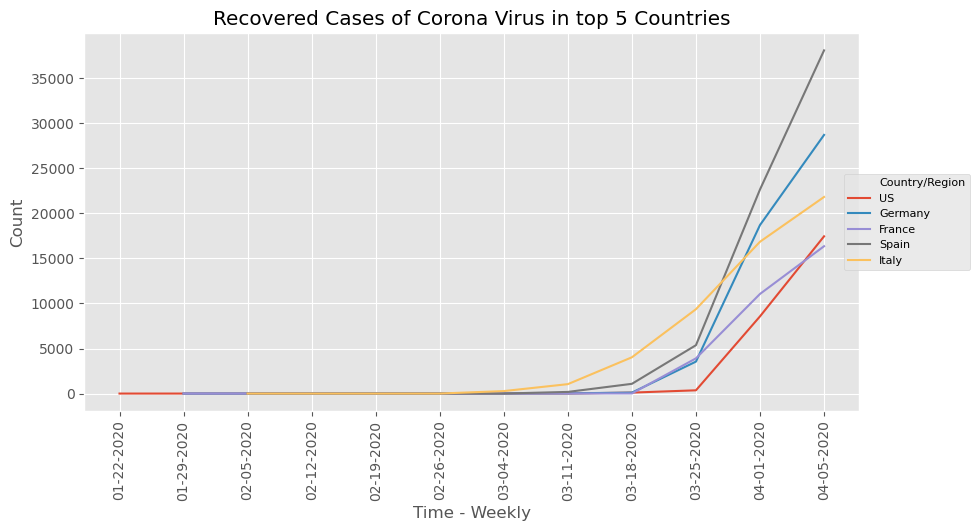

In [8]:
dap.plot_timeline_countrywise_CONFIRMED(COVID_DATA_df)
dap.plot_timeline_countrywise_RECOVERED(COVID_DATA_df)

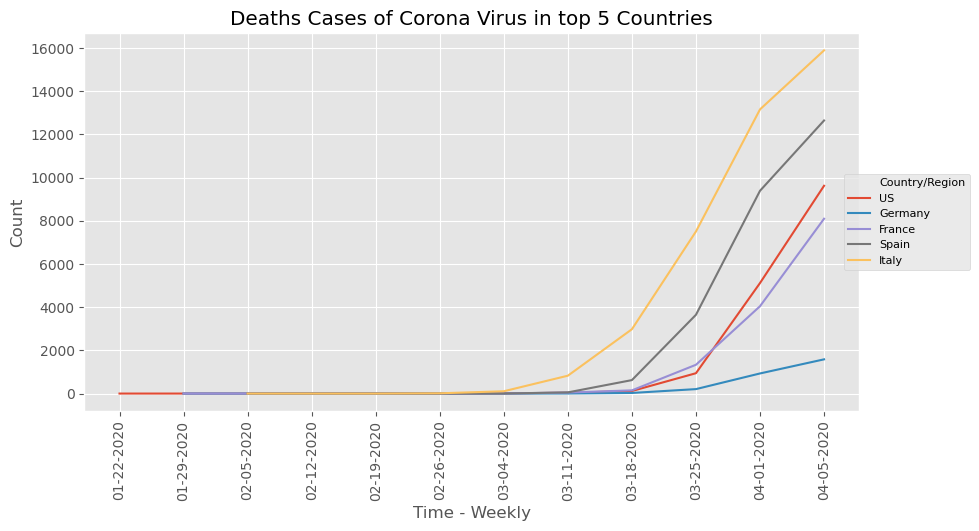

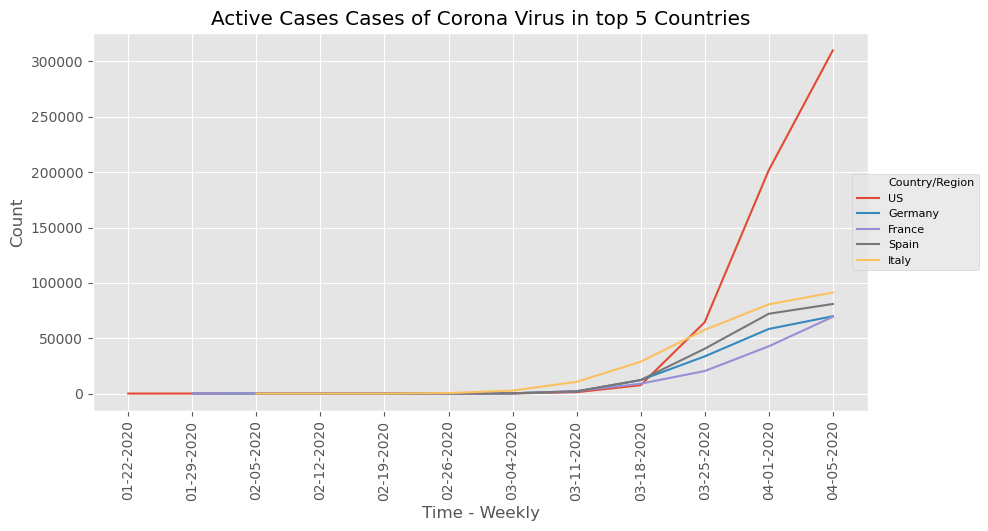

In [9]:
dap.plot_timeline_countrywise_DEATHS(COVID_DATA_df)
dap.plot_timeline_countrywise_ACTIVE(COVID_DATA_df)

# Cases in Selected Countries

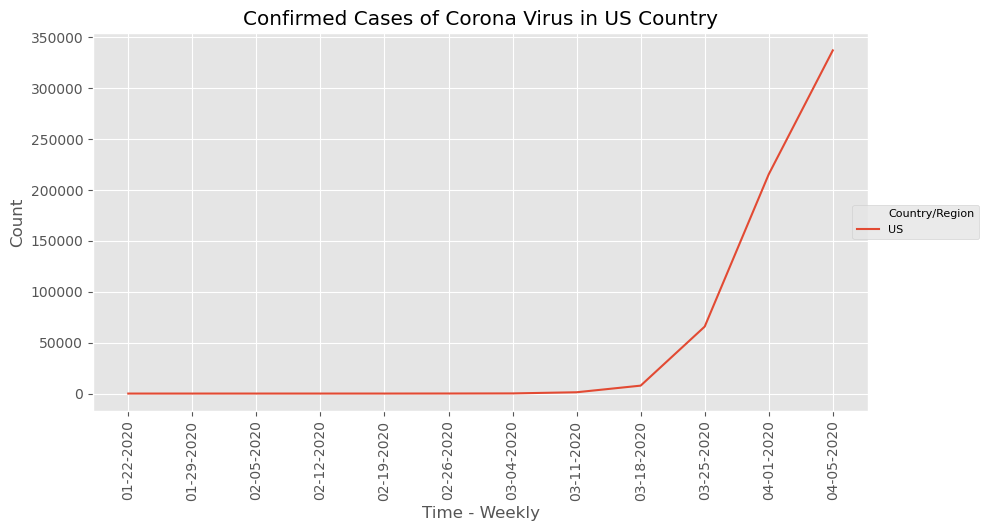

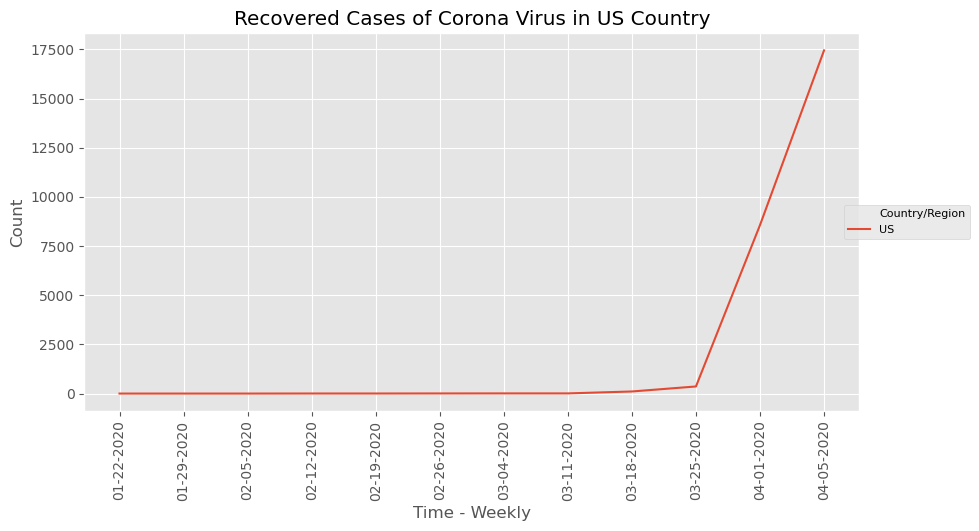

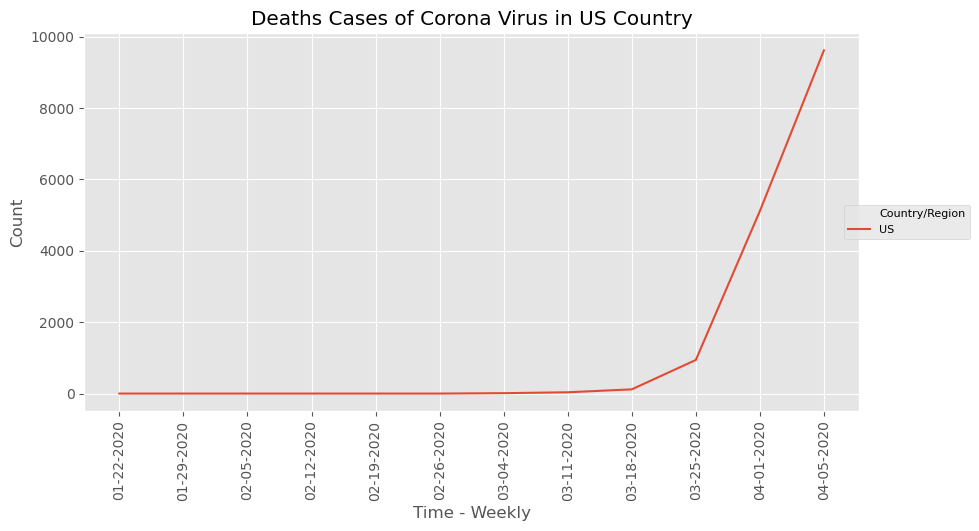

In [10]:
dap.plot_timeline_countrywise_CONFIRMED(COVID_DATA_df, country='US')
dap.plot_timeline_countrywise_RECOVERED(COVID_DATA_df, country='US')
dap.plot_timeline_countrywise_DEATHS(COVID_DATA_df, country='US')

# Plotting the Daily New Cases of CoronaVirus for Countries/States/Cities

# New Cases in Top 5 Impacted Countries

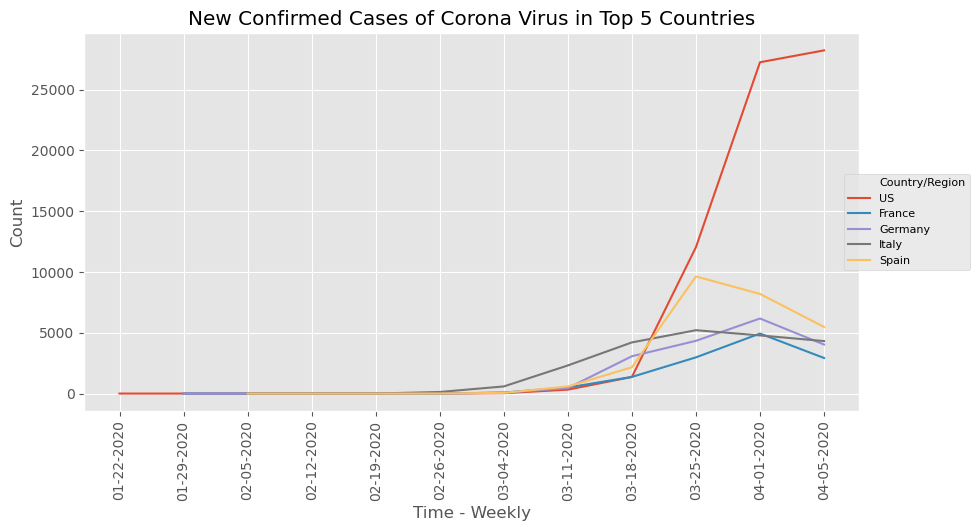

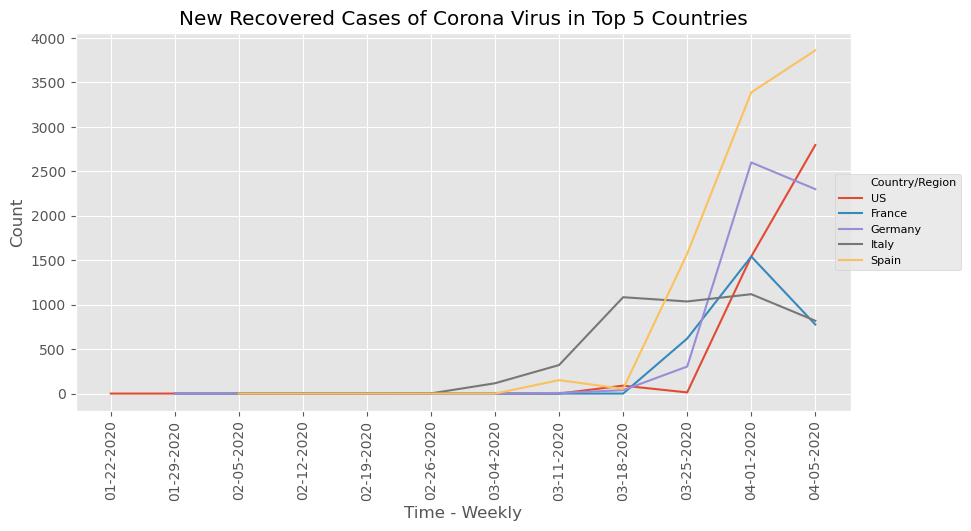

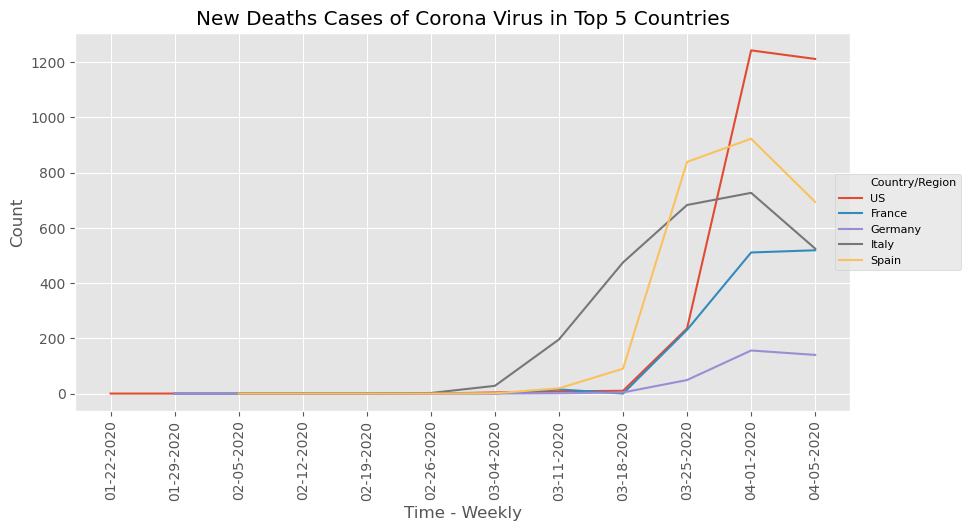

In [11]:
dap.plot_timeline__new_cases_countrywise_CONFIRMED(COVID_DATA_df)
dap.plot_timeline__new_cases_countrywise_RECOVERED(COVID_DATA_df)
dap.plot_timeline__new_cases_countrywise_DEATHS(COVID_DATA_df)

# New Cases in Selected Countries

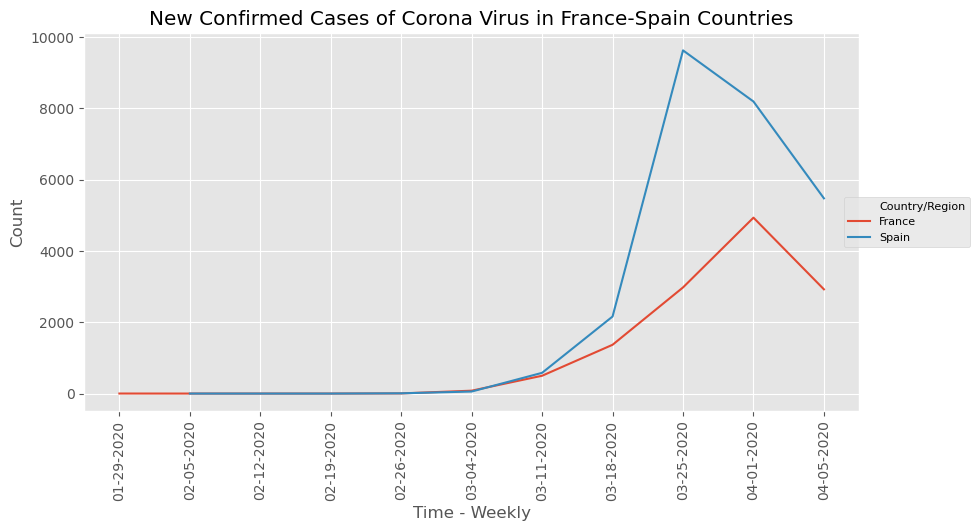

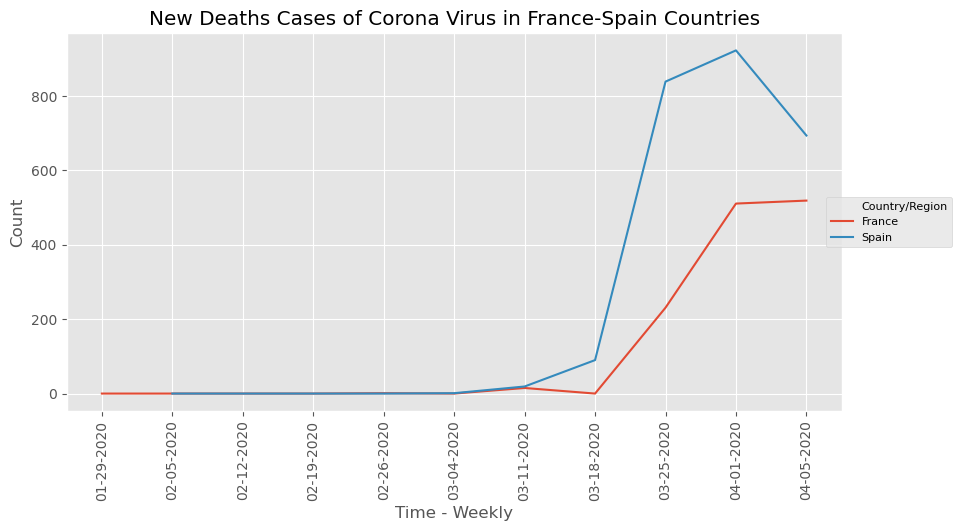

In [12]:
dap.plot_timeline__new_cases_countrywise_CONFIRMED(COVID_DATA_df,country=['France','Spain'])
dap.plot_timeline__new_cases_countrywise_DEATHS(COVID_DATA_df,country=['France','Spain'])